<a href="https://colab.research.google.com/github/san2connect/StatisticalLearning-Project2/blob/master/Introduction_to_Neural_Networks_and_Deep_Learning_R7_INN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT DESCRIPTION

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

# STEPS

The objective of the project is to learn how to implement a simple image classification pipeline based on a
deep neural network and understand the basics of Image Classification
* Read the data from the h5py file and understand the train/test splits (10 points)
* Reshape and normalize the train and test features (10 points)
* One hot encode the labels for train and test data (10 points)
* Define the model architecture using TensorFlow with a flatten layer followed by dense layers with
activation as ReLu and softmax (10 points)
* Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the
metric for evaluation (10 points)
* Fit and evaluate the model. Print the loss and accuracy for the test data (10 points)



# Dataset
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

# Load Dataset

In [1]:
import h5py

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/NeuralNetwork-R7/'

Mounted at /content/drive


In [3]:
import os
os.chdir(data_path)

In [4]:
# Open the file as readonly
h5f =h5py.File(data_path + 'SVHN_single_grey1.h5', 'r')

# Load the training, test and validation se
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
# Close this file
h5f.close()

In [5]:
print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Training Set (42000, 32, 32) (42000,)
Test Set (18000, 32, 32) (18000,)
Total Number of Images 60000


# Data Visualization

6   7   4   4   0   3   0   7   3   1   
0   1   3   1   1   0   0   8   4   6   
5   7   9   1   0   3   0   7   2   1   
1   0   2   9   0   2   5   1   3   2   
7   9   8   4   9   4   5   9   3   4   
0   5   5   8   3   6   6   0   0   6   
8   8   3   1   4   7   0   2   9   4   
8   7   3   9   4   4   3   3   4   4   
8   6   8   7   4   0   4   4   4   1   
4   2   7   4   2   9   1   9   1   0   


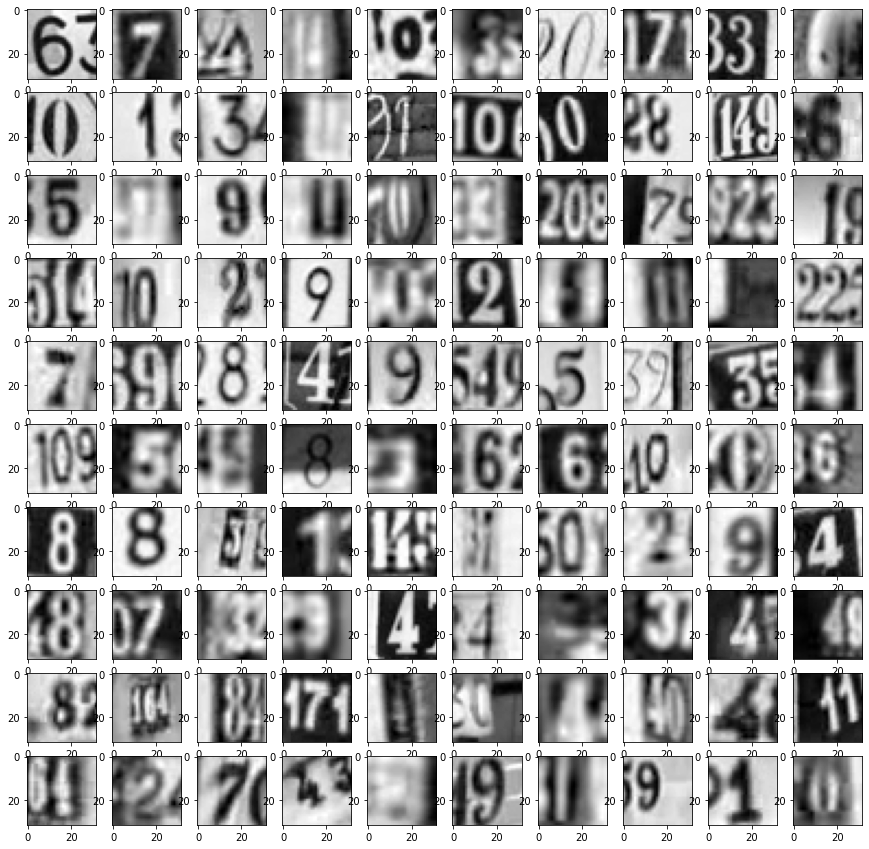

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

columns=10
rows=10

fig=plt.figure(figsize=(15, 15))

for i in range(1,columns*rows+1):
  img=X_train[i]
  fig.add_subplot(rows,columns,i)
  print(y_train[i],end='   ')
  if i % columns == 0:
    print ("")
  plt.imshow(img,cmap='gray')

plt.show()

In [7]:

def plot_images(img1, labels1, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    
    for i, ax in enumerate(axes.flat): 
        if img1[i].shape == (32, 32, 3):
            ax.imshow(img1[i])
        #else:
            #ax.imshow(img1[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels1[i])

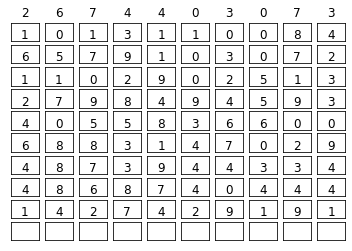

In [8]:
# Plot some training set images
plot_images(X_train, y_train, 10, 10)

## Resize Test and Train 

Resize all the train and test inputs to 28X28, to match with MNIST CNN model's input size